### Car Brand Classification using Deep Learning

#### CNN Model Without using any Transfer learning

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow.keras as K
import tensorflow as tf
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(3, activation = 'softmax'))

classifier.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________

In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Call back functions to be used while training 

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = K.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                          factor=0.6,
                                          patience=2,
                                          verbose=1,
                                          mode='max',
                                          min_lr=1e-7)
# stop training when val_accuracy has stopped improving
early_stop = K.callbacks.EarlyStopping(monitor='val_acc',
                                       patience=3,
                                       verbose=1,
                                       mode='max')
# callback to save the Keras model and (best) weights obtained on an epoch basis. here, the trained (compiled) model is saved in the current working directory as 'cifar10.h5'
checkpoint = K.callbacks.ModelCheckpoint('car_brand_without_transfer_learning.h5',
                                         monitor='val_acc',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         save_freq='epoch')

### Data Augmentation

# Part 2 - Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (64, 64),
                                            batch_size = 4,
                                            class_mode = 'categorical')

print(len(training_set))
print(len(test_set))

train_steps_per_epoch = len(training_set) // 32
val_steps_per_epoch = len(test_set) // 32

print(train_steps_per_epoch)
print(val_steps_per_epoch)

history = classifier.fit_generator(training_set,
                         steps_per_epoch=len(training_set),
                         validation_steps=len(test_set),
                         epochs= 50,
                         validation_data = test_set,
                         callbacks=[lr_reduce, early_stop, checkpoint])

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.
16
15
0
0
Epoch 1/50
15/16 [===========================>..] - ETA: 0s - loss: 1.1212 - acc: 0.2414
Epoch 00001: val_acc improved from -inf to 0.24138, saving model to car_brand_without_transfer_learning.h5
16/16 [==============================] - 6s 390ms/step - loss: 1.1295 - acc: 0.2500 - val_loss: 1.1212 - val_acc: 0.2414
Epoch 2/50
13/16 [=======================>......] - ETA: 0s - loss: 1.1169 - acc: 0.3462
Epoch 00002: val_acc improved from 0.24138 to 0.32759, saving model to car_brand_without_transfer_learning.h5
16/16 [==============================] - 1s 76ms/step - loss: 1.0919 - acc: 0.4062 - val_loss: 1.1211 - val_acc: 0.3276
Epoch 3/50
 9/16 [===============>..............] - ETA: 0s - loss: 1.1199 - acc: 0.3056
Epoch 00003: val_acc did not improve from 0.32759
16/16 [==============================] - 1s 48ms/step - loss: 1.0932 - acc: 0.3906 - val_loss: 1.1173 - val_acc: 0.3276
Epoch 4/50
13/1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

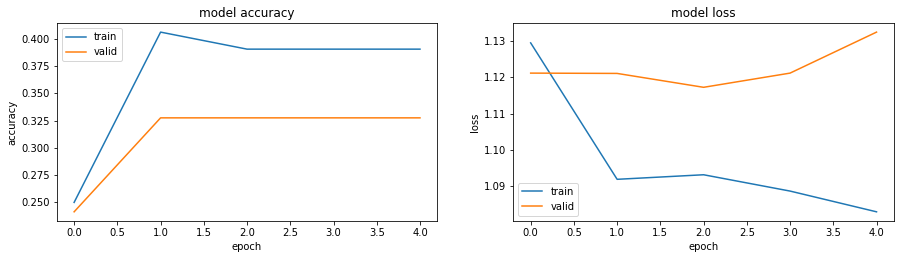

In [4]:
plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

### CNN Model using TransferLearning - RESNET 152 V2

In [5]:
from glob import glob

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# useful for getting number of classes
folders = glob('Datasets/Train/*')
print(folders)
initializer = K.initializers.he_normal()

model = K.applications.ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


for layer in model.layers:
  layer.trainable = False

'''
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)

### Appending of last layer with VGG16 
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()
'''

output = Flatten()(model.output)
#layer_256 = K.layers.Dense(units=256,
#                           activation='elu',
#                           kernel_initializer=initializer,
#                           kernel_regularizer=K.regularizers.l2())
#output = layer_256(output)
#dropout = K.layers.Dropout(0.5)
#output = dropout(output)
softmax = K.layers.Dense(units=len(folders),
                         activation='softmax',
                         kernel_initializer=initializer,
                         kernel_regularizer=K.regularizers.l2())
output = softmax(output)
model = K.models.Model(inputs=model.input, outputs=output)

model.summary()

['Datasets/Train\\audi', 'Datasets/Train\\lamborghini', 'Datasets/Train\\mercedes']
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________

conv3_block4_3_conv (Conv2D)    (None, 28, 28, 512)  66048       conv3_block4_2_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_3_bn (BatchNormali (None, 28, 28, 512)  2048        conv3_block4_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_add (Add)          (None, 28, 28, 512)  0           conv3_block3_out[0][0]           
                                                                 conv3_block4_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________

Total params: 23,888,771
Trainable params: 301,059
Non-trainable params: 23,587,712
__________________________________________________________________________________________________


In [6]:
model.compile(
         optimizer='adam',
         loss='categorical_crossentropy',
         metrics=['accuracy'])

### Call back functions to be used while training 

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = K.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                          factor=0.6,
                                          patience=2,
                                          verbose=1,
                                          mode='max',
                                          min_lr=1e-7)
# stop training when val_accuracy has stopped improving
early_stop = K.callbacks.EarlyStopping(monitor='val_acc',
                                       patience=3,
                                       verbose=1,
                                       mode='max')
# callback to save the Keras model and (best) weights obtained on an epoch basis. here, the trained (compiled) model is saved in the current working directory as 'cifar10.h5'
checkpoint = K.callbacks.ModelCheckpoint('car_brand_RESNET50.h5',
                                         monitor='val_acc',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         save_freq='epoch')

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Train',
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            class_mode = 'categorical')

print(len(training_set))
print(len(test_set))

train_steps_per_epoch = len(training_set) // 32
val_steps_per_epoch = len(test_set) // 32

# fit the model
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[lr_reduce, early_stop, checkpoint],
  verbose=1
)

Found 64 images belonging to 3 classes.
Found 64 images belonging to 3 classes.
16
16
Epoch 1/50
16/16 [==============================] - 4s 240ms/step - loss: 11.0726 - acc: 0.3906

Epoch 00001: val_acc improved from -inf to 0.39062, saving model to car_brand_RESNET50.h5
16/16 [==============================] - 25s 2s/step - loss: 6.4288 - acc: 0.5312 - val_loss: 11.0726 - val_acc: 0.3906
Epoch 2/50
16/16 [==============================] - 4s 221ms/step - loss: 19.0207 - acc: 0.3906

Epoch 00002: val_acc did not improve from 0.39062
16/16 [==============================] - 8s 511ms/step - loss: 3.2841 - acc: 0.8281 - val_loss: 19.0207 - val_acc: 0.3906
Epoch 3/50
16/16 [==============================] - 4s 226ms/step - loss: 19.0889 - acc: 0.3906

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 00003: val_acc did not improve from 0.39062
16/16 [==============================] - 8s 528ms/step - loss: 3.3588 - acc: 0.8438 - val_loss: 19.0889 - val_